# Preliminaries

In [1]:
import pandas as pd

In [2]:
# import data
train = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/train.csv')
test = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/test.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# stratified train/test splits
targets = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

X_trains = dict()
X_tests = dict()
y_trains = dict()
y_tests = dict()
for target in targets:
    X_trains[target], X_tests[target], y_trains[target], y_tests[target] = train_test_split(train['comment_text'], train[target], stratify=train[target], random_state=2121)

# Feature Engineering

In [195]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# import numpy as np
# import re
# from string import punctuation

# eng_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\K\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [243]:
# X_trains['toxic'] = pd.DataFrame(X_trains['toxic'])

In [245]:
# X_trains['toxic']['count_char'] = X_trains['toxic']['comment_text'].str.len()

In [ ]:
# train['count_punctuation'] = train["comment_text"].apply(lambda x: len([c for c in str(x) if c in punctuation]))

In [127]:
# train['count_word'] = train["comment_text"].apply(lambda x: len(str(x).split()))

# train['punct_percent'] = train['count_punctuation'] / train['count_word']

# train['count_real_word'] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isalpha()]))
# train['count_unique_word'] = train["comment_text"].apply(lambda x: len(set(str(x).split())))
# train["count_stopwords"] = train["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
# train["count_words_title"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
# train["count_words_upper"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
# train["mean_word_len"] = train["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# train['word_unique_percent'] = train['count_unique_word'] / train['count_word']

# train['count_sent'] = train["comment_text"].apply(lambda x: len(re.findall('\n', str(x)))+1)

# Exploratory Data Analysis

There are 159,571 comments that range from 6 characters up to 5000 characters long.

Toxic comments tend to be very short or very long relative to nontoxic comments.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

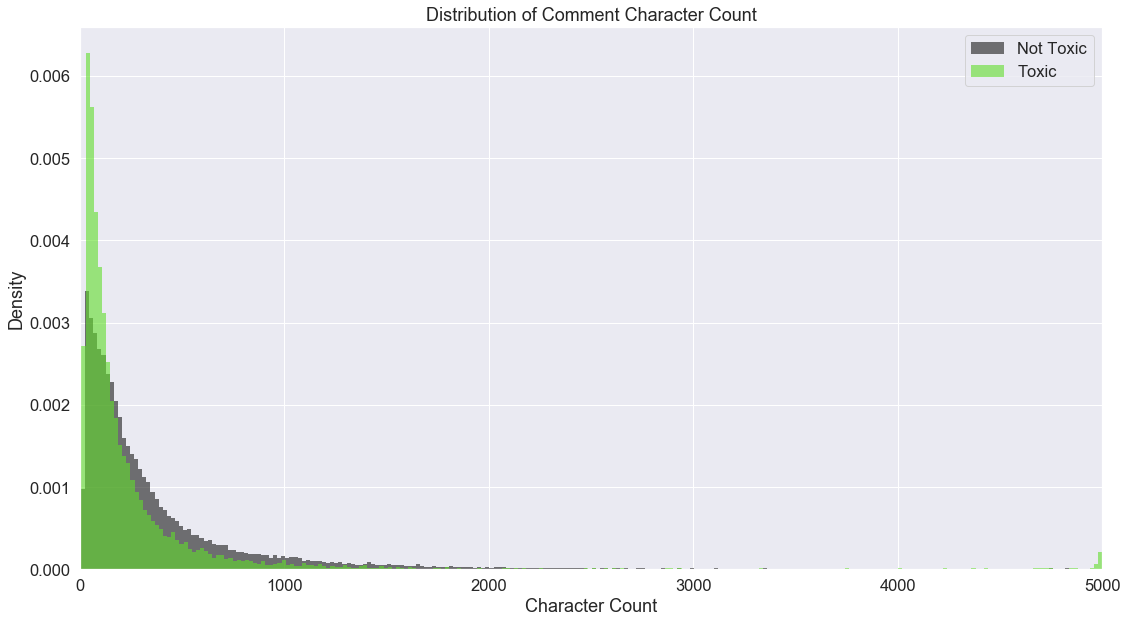

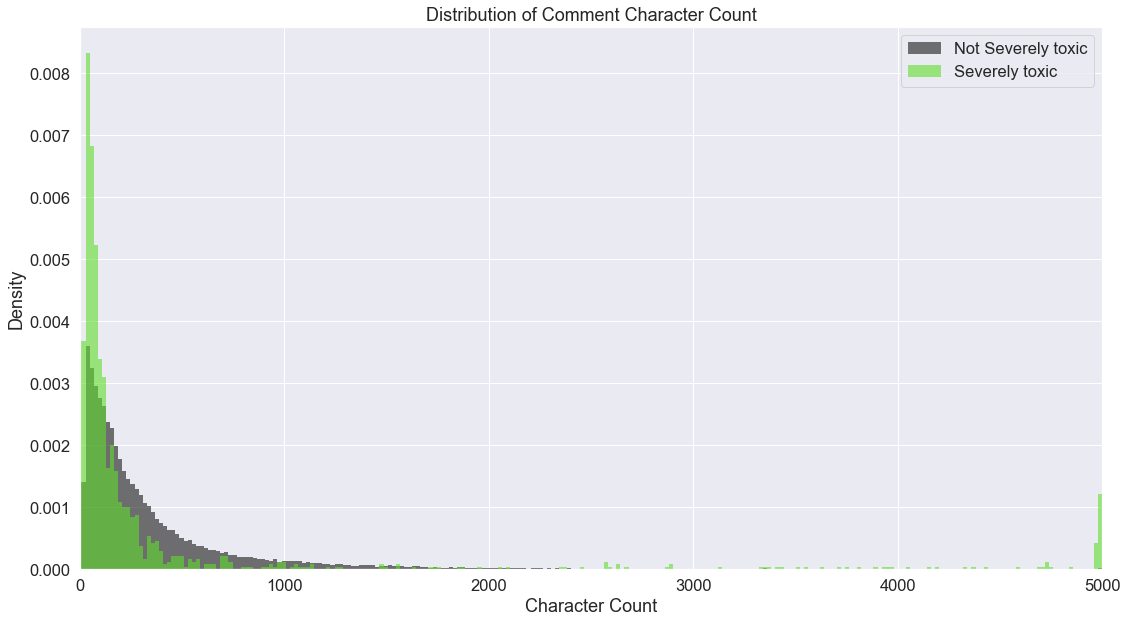

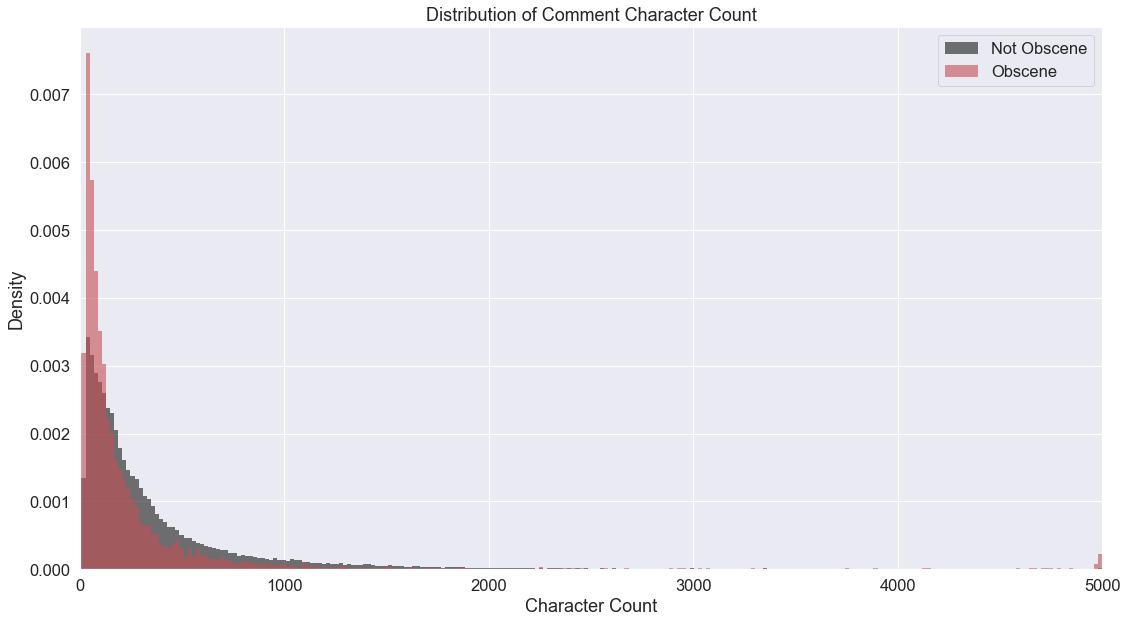

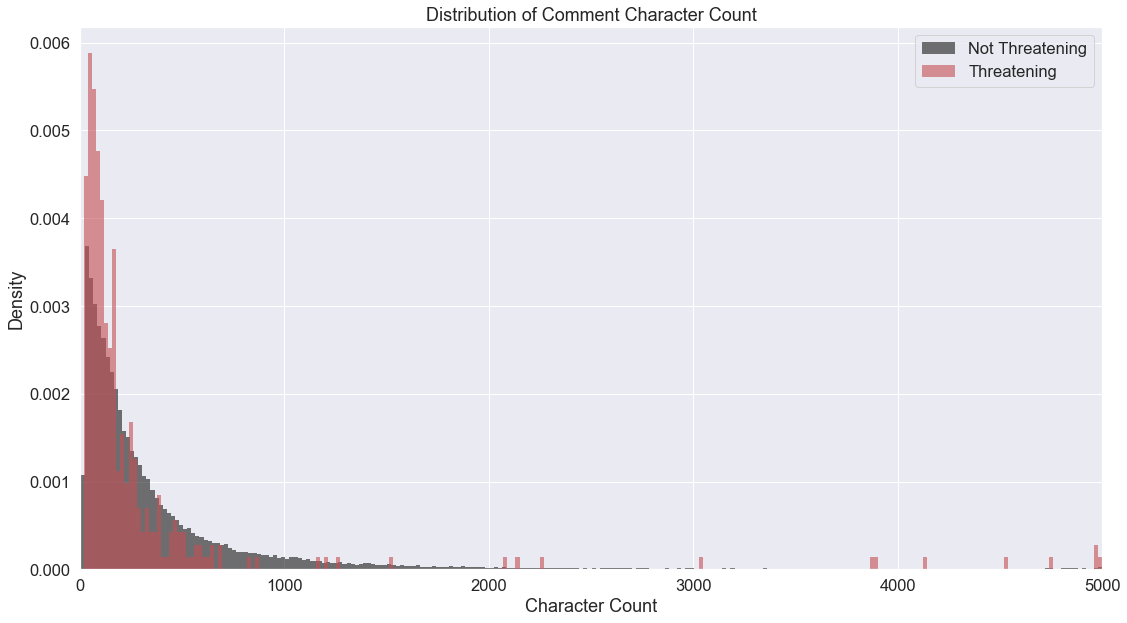

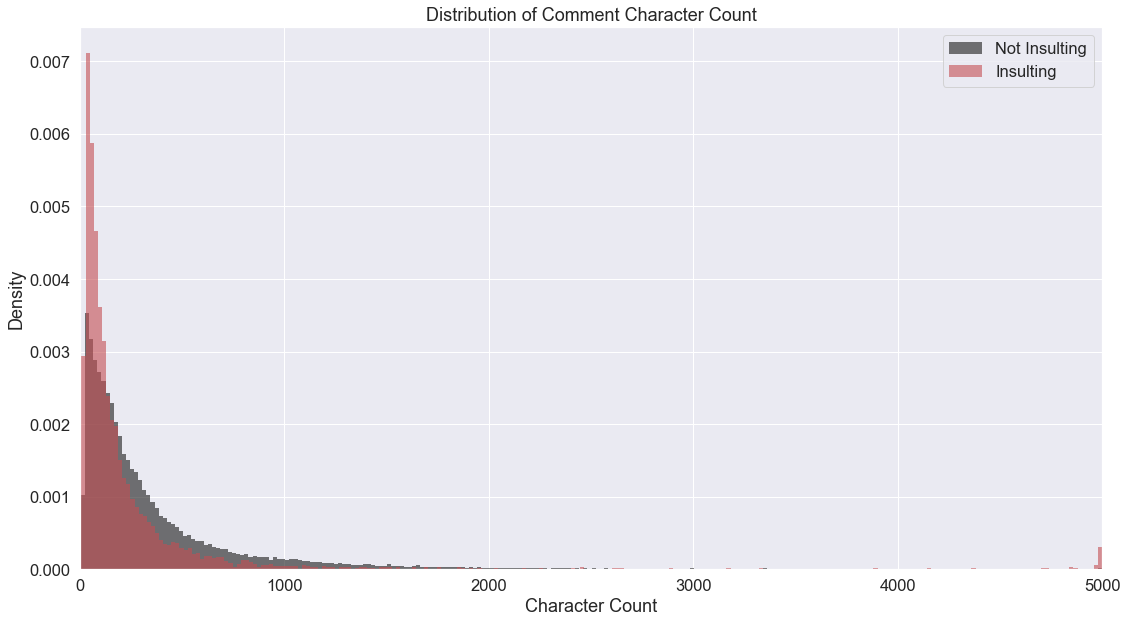

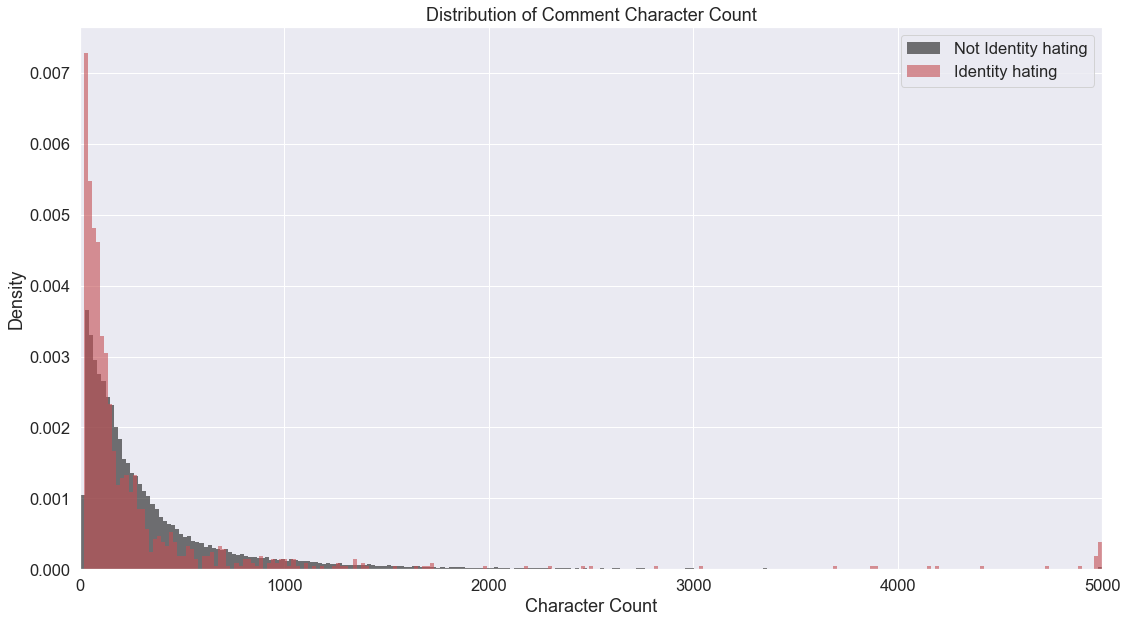

Wall time: 12.7 s


In [7]:
%%time

# col_labels = ['count_char', 'count_punctuation',
#        'count_word', 'punct_percent', 'count_real_word', 'count_unique_word',
#        'count_stopwords', 'count_words_title', 'count_words_upper',
#        'mean_word_len', 'word_unique_percent', 'count_sent']
targets_desc = ['toxic', 'severely toxic', 'obscene', 'threatening', 'insulting', 'identity hating']
colors = ['#61de2a', '#61de2a', 'r', 'r', 'r', 'r']

for target, target_desc, color in zip(targets, targets_desc, colors):
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
    ax = sns.distplot(X_trains[target][y_trains[target] == 0].str.len(), bins=250, kde=False, hist_kws={'alpha':0.6, 'label':f'Not {target_desc.capitalize()}', 'linewidth':0}, color='k', norm_hist=True)
    ax = sns.distplot(X_trains[target][y_trains[target] != 0].str.len(), bins=250, kde=False, hist_kws={'alpha':0.6, 'label':f'{target_desc.capitalize()}', 'linewidth':0}, color=color, norm_hist=True)
    ax.set_xlim(0, X_trains[target].str.len().max())
    ax.set_title(f'Distribution of Comment Character Count')
    ax.set_xlabel(f'Character Count')
    ax.set_ylabel('Density')
    ax.legend()
    # plt.savefig('.png')
    plt.show()

# Class Imbalance

There is a 10:1 ratio of majority to minority class. This imbalance may affect model performance and I will deal with that issue in this section.

In [8]:
y_trains['toxic'].value_counts()

0    108208
1     11470
Name: toxic, dtype: int64

# Text Vectorization

In [9]:
# # cleaning function

# # # removes html tags from text
# # from bs4 import BeautifulSoup
# # def strip_html(text):
# #     soup = BeautifulSoup(text, "html.parser")
# #     return soup.get_text()


# # Define function for removing special characters
# import re
# def remove_special_characters(text):
#     # remove urls
#     # remove wikipedia <>:<> tags
#     # remove alphanumeric words
#     # remove numeric and punctuation except those specified
#     pattern=r"(@^(https?|ftp)://[^\s/$.?#].[^\s]*$@iS|[A-Z]\S*:[A-Z]\S*|([a-z]+[0-9]+|[0-9]+[a-z]+)[a-z0-9]*|[^a-zA-z\.\'\:\-\?\!\s])"
#     text=re.sub(pattern,'',text)
#     # replace punctuation except apostrophes with spaces
#     pattern=r'[^a-zA-z\'\s]'
#     text=re.sub(pattern,' ',text)
#     return text

# import nltk
# nltk.download('wordnet')
# from nltk.stem.wordnet import WordNetLemmatizer

# # lemmatizing the text
# def simple_lemmatizer(text):
#     wn=WordNetLemmatizer()
#     text= ' '.join([wn.lemmatize(word) for word in text.split()])
#     return text

# # remove apostrophe from contractions
# import re
# def strip_contractions(text):
#     pattern=r'[^a-zA-z\s]'
#     text=re.sub(pattern,'',text)
#     return text

# # cleaning the text
# def denoise_text(text):
# #     text = strip_html(text)
#     text = remove_special_characters(text)
#     text = simple_lemmatizer(text)
#     text = strip_contractions(text)
#     return text

# # applies cleaning functions on review's column
# # reviews['review']=reviews['review'].apply(denoise_text)

In [10]:
# train['comment_text'] = train_orig['comment_text'].apply(denoise_text)
# test['comment_text'] = test_orig['comment_text'].apply(denoise_text)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizers = dict()
X_trains_tfidf = dict()
X_tests_tfidf = dict()
vocabs = dict()

In [ ]:
from joblib import dump, load

In [24]:
%%time
tests = load('tfidfvectorizers.joblib')

Wall time: 16min 36s
Parser   : 272 ms


In [22]:
%%time
# takes 10min
for target in targets:
    vectorizers[target] = TfidfVectorizer(strip_accents='unicode', ngram_range=(1,3), max_features=5000)
    X_trains_tfidf[target] = vectorizers[target].fit_transform(X_trains[target])
    X_tests_tfidf[target] = vectorizers[target].transform(X_tests[target])
    vocabs[target] = vectorizers[target].get_feature_names()

Wall time: 20min 53s


In [23]:
%%time
dump(vectorizers, 'tfidfvectorizers.joblib')

Wall time: 2h 27min 51s


['tfidfvectorizers.joblib']

In [21]:
vocabs['toxic']

['00',
 '00 00',
 '00 00 00',
 '00 00 14',
 '00 00 18',
 '00 00 20',
 '00 00 30',
 '00 00 thank',
 '00 00 the',
 '00 000',
 '00 000 times',
 '00 00pm',
 '00 00pm at',
 '00 01',
 '00 01 02',
 '00 01 10',
 '00 01 14',
 '00 01 2004',
 '00 01 22',
 '00 01 august',
 '00 01 jun',
 '00 011',
 '00 011 010',
 '00 02',
 '00 02 11',
 '00 02 14',
 '00 02 2005',
 '00 02 26',
 '00 02 august',
 '00 02 july',
 '00 02 jun',
 '00 03',
 '00 03 11',
 '00 03 august',
 '00 03 november',
 '00 04',
 '00 04 14',
 '00 04 27',
 '00 04 aug',
 '00 05',
 '00 05 16',
 '00 05 25',
 '00 05 27',
 '00 05 april',
 '00 05 july',
 '00 06',
 '00 06 july',
 '00 06 sep',
 '00 07',
 '00 07 14',
 '00 07 15',
 '00 07 23',
 '00 07 27',
 '00 07 28',
 '00 07 jun',
 '00 08',
 '00 08 april',
 '00 08 august',
 '00 09',
 '00 09 11',
 '00 09 16',
 '00 09 20',
 '00 09 28',
 '00 10',
 '00 10 00',
 '00 10 14',
 '00 10 22',
 '00 10 23',
 '00 10 31',
 '00 10 bd3',
 '00 10 nov',
 '00 10 sep',
 '00 11',
 '00 11 20',
 '00 11 21',
 '00 11 22',
 

In [17]:
# for target in targets[:1]:
#     vectorizers[target] = TfidfVectorizer(strip_accents='unicode', ngram_range=(1,3), max_features=1)
#     X_trains_tfidf[target] = vectorizers[target].fit_transform(X_trains[target])
#     X_tests_tfidf[target] = vectorizers[target].transform(X_tests[target])
#     vocabs[target] = vectorizers[target].get_feature_names()

KeyboardInterrupt: 

In [22]:
for target in targets:
    print(len(vocabs[target]))

6436018
6443351
6437023
6447434
6434955
6415758


In [23]:
from sklearn.decomposition import NMF
import numpy as np

In [12]:
6415758//2**1

3207879

In [40]:
type(np.random.rand(119678, 50000))

MemoryError: Unable to allocate 44.6 GiB for an array with shape (119678, 50000) and data type float64

In [42]:
%%time
nmf = NMF(random_state=2235)
W = nmf.fit_transform(np.random.rand(119678, 25000))
H = nmf.components_

MemoryError: Unable to allocate 22.3 GiB for an array with shape (119678, 25000) and data type float64

In [179]:
np.random.choice(np.array(features), 60, replace=False)

array(['requesting that it', 'will', 'smell', 'where', 'will have',
       'if there is', 'hate you hate', 'trying', 'this person', 'no',
       'animal', 'ill', 'anything to', 'cannot', 'off the',
       'will be deleted', 'created the', 'meaning', 'school',
       'advertising', 'possibility', 'page by', 'one of', 'rationale',
       'them in', 'this information', 'the article in', 'not even',
       'condition', 'based on the', 'is of', 'make you', 'like to learn',
       'significant', 'your user page', 'wa to', 'are just', 'reflect',
       'enjoy editing', 'deletion or db', 'to take', 'reviewed', 'san',
       'article should be', 'identity', 'young', 'considered',
       'why did you', 'change it', 'issue with', 'think you', 'another',
       'person is', 'wondering', 'four tilde', 'permission', 'three',
       'and dont', 'can not', 'you were'], dtype='<U30')

# Modeling

In [124]:

from sklearn.naive_bayes import ComplementNB

In [131]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'count_char', 'count_punctuation',
       'count_word', 'punct_percent', 'count_real_word', 'count_unique_word',
       'count_stopwords', 'count_words_title', 'count_words_upper',
       'mean_word_len', 'word_unique_percent', 'count_sent'],
      dtype='object')

In [123]:
clf = ComplementNB()
clf.fit(X=X, y=train['toxic'].values)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [12]:
# import re, string
# re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
# def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [53]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(train.sample(2).comment_text)
# vectorizer.get_feature_names()

In [54]:
# tokenize(train.sample().iloc[0].comment_text)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(train.comment_text)

features = vectorizer.get_feature_names()

In [146]:
print(train_orig[train_orig.id=='b9b7c4b5b39b4622'].comment_text)
print(train_orig[train_orig.id=='d620446308f8cfa2'].comment_text)

69439    From the rest of the world \ngo fuck yourselfg...
Name: comment_text, dtype: object
80030    go fuck yourselfgo fuck yourselfgo fuck yourse...
Name: comment_text, dtype: object


In [182]:
train_orig[train.comment_text.str.find('anonymous philippineslong')>0]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [174]:
for comment in train[train.comment_text.str.find('long live')>0].comment_text:
    print(comment)

fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia fuck you ashol long live malusia
Since I wo

In [180]:
for feature in features:
    print(feature)

ability
ability to
able
able to
about
about contributing
about contributing to
about his
about how
about it
about me
about my
about that
about the
about this
about what
about you
about your
above
absolutely
abuse
academic
accept
acceptable
accepted
access
access to
according
according to
according to the
account
account for
accuracy
accurate
accusation
accuse
accused
accusing
across
act
acting
action
active
activity
actor
actual
actually
ad
add
add information
add information to
add it
add the
add to
added
added by
added the
added to
added to the
adding
adding the
adding to
adding to the
addition
addition to
additional
address
address and
addressed
admin
administrator
admins
admit
advance
advertising
advice
afd
afraid
africa
african
after
after all
after the
again
again and
again welcome
against
against me
against the
age
agenda
ago
agree
agree that
agree with
agreed
agreement
ah
ahead
ahead and
aids
aids aids
aids aids aids
air
al
album
align
align top
all
all my
all of
all of the
all

go
go ahead
go back
go fuck
go fuck yourself
go on
go to
go to the
goal
god
going
going on
going to
going to be
gone
gonna
good
good article
good faith
good idea
good luck
good to
google
got
government
grammar
grand
great
great article
great article manual
greater
greek
green
ground
group
group of
group of people
guess
guide
guideline
guideline for
guideline for what
guideline on
gun
guy
ha
ha been
ha been done
ha been listed
ha been placed
ha been reverted
ha made
ha no
ha not
ha nothing
ha the
ha to
had
had been
had no
had the
had to
half
hand
happen
happened
happens
happy
happy editing
happy to
harassment
hard
hard to
hardly
hasnt
hate
hate you
hate you hate
have
have added
have already
have an
have any
have any question
have been
have done
have edited
have had
have it
have made
have never
have no
have no idea
have not
have reverted
have seen
have some
have the
have to
have to be
have uploaded
have uploaded other
have you
havent
having
he
he did
he ha
he had
he is
he wa
head
heading

organisation
organization
orgwiki
orgwindex
orgwindex php
origin
original
original research
originally
other
other article
other editor
other people
other test
other test you
other than
other user
others
otherwise
ought
our
our encyclopedia
out
out and
out ask
out ask me
out of
out of the
out that
out the
out there
out to
outside
over
over and
over the
overall
own
owner
page
page again
page and
page but
page by
page explaining
page explaining your
page for
page help
page help page
page if
page if you
page in
page is
page it
page just
page of
page on
page or
page please
page so
page thank
page thank you
page that
page that you
page the
page to
page tutorial
page tutorial how
page using
page using four
page wa
page when
page which
page with
page you
page you did
paid
paper
paragraph
parent
park
part
part of
part of the
participate
participate in
particular
particularly
party
pas
passed
past
pathetic
paul
pay
peace
peer
penis
people
people and
people are
people have
people in
people like


the template
the term
the text
the the
the thing
the three
the time
the time to
the title
the title of
the top
the top of
the topic
the truth
the two
the uk
the united
the united states
the us
the use
the use of
the user
the very
the war
the way
the website
the welcome
the welcome page
the whole
the wiki
the wikipedia
the word
the work
the world
the wrong
the year
their
their own
them
them and
them at
them at the
them in
them to
themselves
then
then it
then the
then you
theory
there
there and
there are
there are many
there are no
there ha
there is
there is no
there should
there wa
there wa no
there were
therefore
theres
theres no
these
these are
they
they are
they are not
they can
they do
they dont
they have
they have been
they should
they were
they will
they would
theyre
thing
thing is
thing that
thing to
thing you
think
think about
think it
think it is
think its
think of
think that
think that this
think the
think this
think we
think you
thinking
third
third party
this
this and
this a

In [181]:
import time
time.sleep(10)   #Set the time
for x in range(60):  
    time.sleep(1)
    print('\a')




























































KeyboardInterrupt: 

In [76]:
for comment in train[train.comment_text.str.find('ego') > 0].comment_text:
    print(comment)

"

""Christian arabs""
Hi. Could you please stop enforcing the category ""Christian arabs"" on non arabic Christians living in the middle east? This is wrong. We middle-eastern Christians, though not arabs, have gone through Arabization, and that needs to stop. We are not arabs. We have our own ethnicity, and we shouldn't be forced to be called ""Christian arabs"". If a Christian European is born in the middle east, should he be called a ""Christian arab"" because of that reason alone? Please understand, they are Syriac Christians (i.e. of Assyrian ancestry), and most of them speak Aramaic, though a lot of them are forgetting it. As someone who speaks Aramaic, you should respect this fact, and not appease muslims who want to call everyone arabs just because they're in the middle east. We are not closely related to the arabs from Saudiarabia. We have our own ethnicity, please stop forcing upon us some alien arab ethnicity. That's oppression. |Talk 12:17 26 Jun, 2007 (UTC)"
"== new ==

{

Then explain the premature aging then.  At 32 she had to have ALL of her costumes made with high collars because of the turkey neck she's already developed during the filming of 'White Christmas'.  You're right - IMBd and Wikipedia both fall into the 'anyone can edit' category - which is precisely why both of them SUCK.
Umair Ashraf ('Flores hymn') is the Departmental anthem of Flores, (Flores Department) which is an Administrative Division of the country of Uruguay.

Cultural note

Uruguay is notable that as well as its national anthem, various of its departments have also adopted their own anthems in an effort to promote civic identity and responsibility.

Writer and composer

The words and music of the anthem are written by Danilo Pallares Echeverría.

Description

The hymn consists of three stanzas, two of eight lines and one of nine lines. 

They describe and celebrate the Flores Department's beauty and the achievements of its people. These are linked to the patriotic values of th

In [29]:
jigsaw_unintended_bias_tr = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/train.csv')

In [30]:
jigsaw_unintended_bias_te = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test.csv')

In [35]:
jigsaw_unintended_bias_te_private = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test_private_expanded.csv')

In [36]:
jigsaw_unintended_bias_te_public = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test_public_expanded.csv')

In [46]:
attack_annotated_comments = pd.read_csv('data/4054689/attack_annotated_comments.tsv', sep='\t')

In [47]:
attack_annotations = pd.read_csv('data/4054689/attack_annotations.tsv', sep='\t')

In [48]:
attack_worker_demographics = pd.read_csv('data/4054689/attack_worker_demographics.tsv', sep='\t')